
# Stroke Data Analysis

This notebook aims to explore a dataset related to stroke risk factors, analyzing the main characteristics of the population and how different factors influence the occurrence of strokes. We focus on descriptive analysis and visual exploration to identify patterns and trends that may help explain stroke risk.


# Stroke Data

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
#Count null values in the Dataset
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
#Out of 5110 rows, only 201 rows have missing values for BMI, which is about 3.93%. 
# Dropping them won’t drastically reduce the dataset size, so i'm not sacrificing much data.

df.dropna(inplace=True)

In [7]:
df.shape

(4909, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [9]:
df['age'] = df['age'].astype('int64')

In [10]:
df.dtypes

id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

#### Age distribution

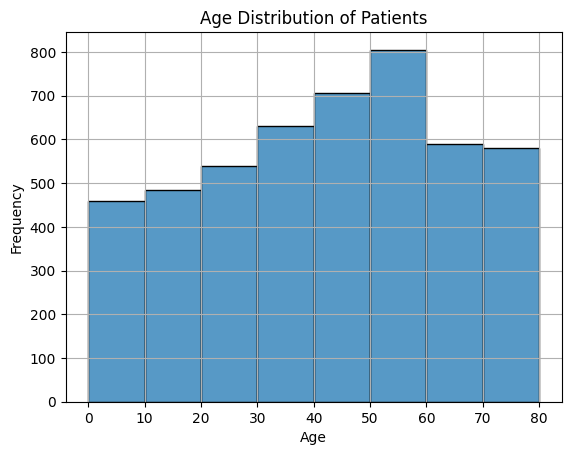

In [11]:
# Get the minimum and maximum ages to define bins for age ranges
min_age = df['age'].min()
max_age = df['age'].max()

# Define bins for the histogram (10-year intervals from 0 to max_age + 5)
bins = range(0, int(max_age) + 5, 10)

# Plot histogram to visualize age distribution of patients
sns.histplot(data=df, x='age', bins=bins)

# Add labels and a title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients')
plt.grid(True)
plt.show()

# Key Insights:
# 1. Most frequent age groups: Helps identify which age ranges are most common, 
#    giving insight into the demographic focus (e.g., elderly patients if skewed right).
# 2. Healthcare targeting: If older patients dominate, the dataset may focus on age-related conditions like stroke.
# 3. Gaps: If certain age groups are underrepresented, it could indicate a data bias.

#### Age Distribution by Stroke Occurrence

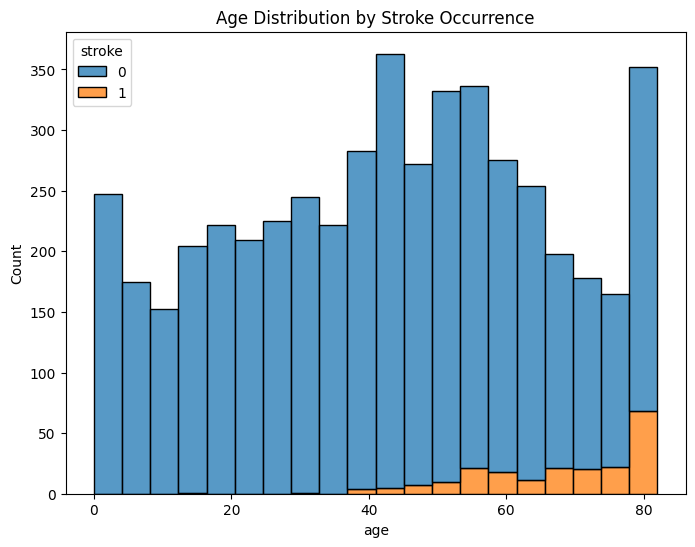

In [12]:
plt.figure(figsize=(8,6))

# Plot histogram showing age distribution by stroke occurrence (stacked)
sns.histplot(data=df, x='age', hue='stroke', multiple='stack', kde=False)

# Add title for context
plt.title('Age Distribution by Stroke Occurrence')
plt.show()

# Key Insights:
# 1. Age groups at higher stroke risk: The stacked bars help identify which age ranges have a higher proportion of stroke occurrences.
# 2. Risk concentration: If strokes are concentrated in older age groups, this indicates a stronger correlation between age and stroke risk.
# 3. Healthcare intervention: Insights from this distribution can help target preventive healthcare for specific age groups more likely to suffer from strokes.

#### BMI Distribution

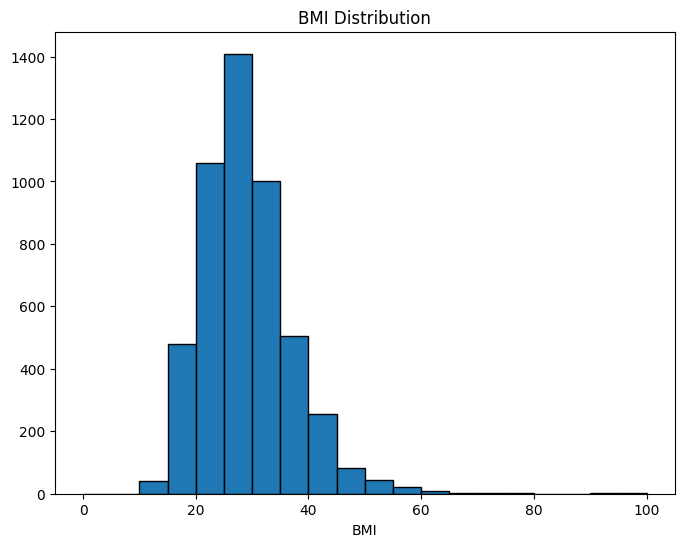

In [13]:
# Get the minimum and maximum BMI values to define bins
min_BMI = df['bmi'].min()
max_BMI = df['bmi'].max()

plt.figure(figsize=(8,6))

# Plot histogram to visualize BMI distribution (5-unit bins)
plt.hist(df['bmi'], bins=range(0, int(max_BMI)+ 5, 5), edgecolor='black')

# Add labels and title
plt.xlabel('BMI')
plt.title('BMI Distribution')
plt.show()

# Key Insights:
# 1. Identifying BMI ranges: The histogram shows the most common BMI ranges in the dataset, helping identify whether patients tend to be underweight, normal, overweight, or obese.
# 2. Healthcare relevance: If many patients fall into overweight or obese categories, it could indicate a higher risk for stroke and other related health conditions.
# 3. Data coverage: The plot helps spot any potential gaps in BMI data and see if the distribution aligns with typical health datasets.


#### Identificar outliars no BMI

In [14]:
# Calculate the quartiles (Q1 and Q3) and the interquartile range (IQR) for BMI
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1  # IQR is the range between the first and third quartiles

# Define the limits to identify outliers using the 1.5*IQR rule
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers: BMI values outside the lower and upper bounds are considered outliers
outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]

# Display the limits and the number of outliers found
print(f'Lower limit: {lower_bound}')
print(f'Upper limit: {upper_bound}')
print(f'Number of outliers: {len(outliers)}')

# Key Insights:
# 1. Outliers detection: This identifies extreme BMI values that are unusually low or high, which could indicate data entry errors or atypical health conditions.
# 2. Potential health risks: Very high or low BMI outliers could indicate patients at a greater health risk, which may require further investigation or specific health interventions.
# 3. Data quality check: The presence of many outliers might suggest issues with data consistency or represent individuals with uncommon health profiles.

Lower limit: 9.099999999999998
Upper limit: 47.5
Number of outliers: 110


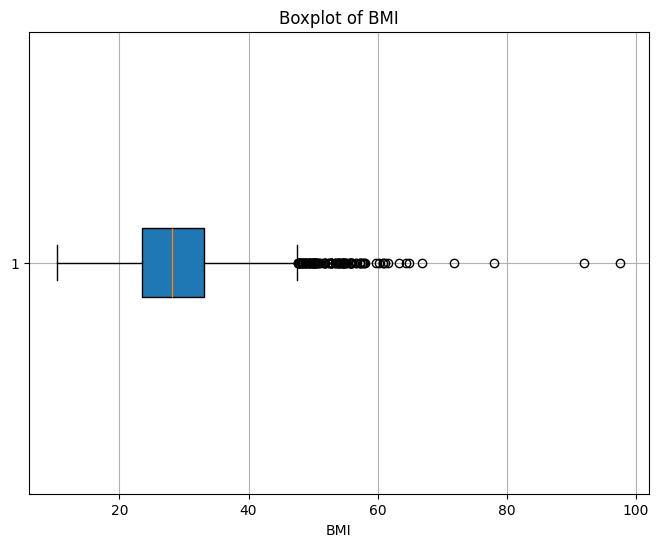

In [15]:
plt.figure(figsize=(8, 6))

# Create a boxplot to visualize the distribution of BMI
# This helps to identify the spread, median, quartiles, and outliers of the BMI data
plt.boxplot(df['bmi'], vert=False, patch_artist=True)

# Add labels and title for clarity
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.grid(True)  # Adding a grid for better readability of the plot
plt.show()

# Key Insights:
# 1. Median and Quartiles: The boxplot shows the median (middle line) and the interquartile range (IQR), which helps understand the central tendency and spread of BMI values.
# 2. Outliers: Points outside the whiskers represent outliers, which could indicate unusually high or low BMI values that need further investigation.
# 3. Data Spread: The length of the box and whiskers shows the variability in BMI. A longer box or whiskers could indicate higher variability, while a compact box suggests most patients fall within a smaller BMI range.

#### Distribution of Average Glucose Level

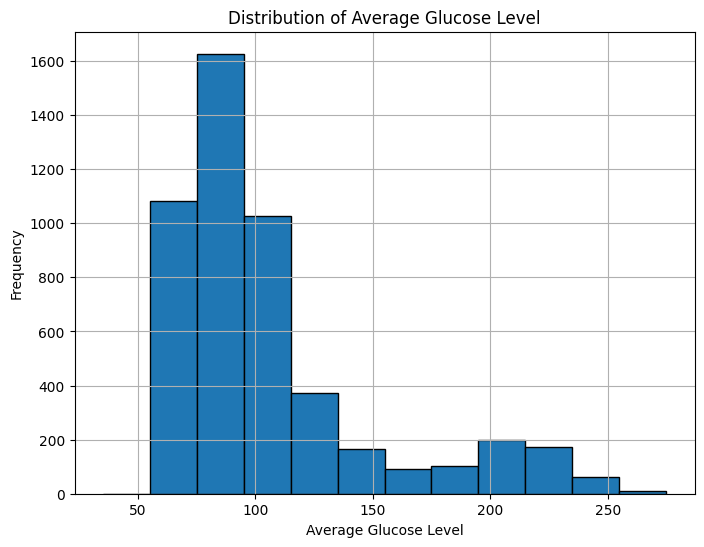

In [16]:

# Get the minimum and maximum glucose levels to define appropriate binning for the histogram
min_gluc = df['avg_glucose_level'].min()
max_gluc = df['avg_glucose_level'].max()

plt.figure(figsize=(8, 6))

# Plot histogram to visualize the distribution of average glucose levels
# Bins are set in intervals of 20 units to show the spread of glucose levels across the population
plt.hist(df['avg_glucose_level'], edgecolor='black', bins=range(int(min_gluc) - 20, int(max_gluc) + 20, 20))

# Add labels and title to the plot for context
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.title('Distribution of Average Glucose Level')

# Enable gridlines for easier interpretation of the plot
plt.grid(True)
plt.show()

# Key Insights:
# 1. Glucose Level Distribution: Identifies the most common glucose levels among the patients, giving insight into the overall metabolic health of the population.
# 2. Health Implications: High glucose levels can signal a greater risk for conditions such as diabetes, which may be linked to stroke risk.
# 3. Outliers or Extremes: The plot may reveal unusually high or low glucose levels that could indicate extreme cases or possible data issues.

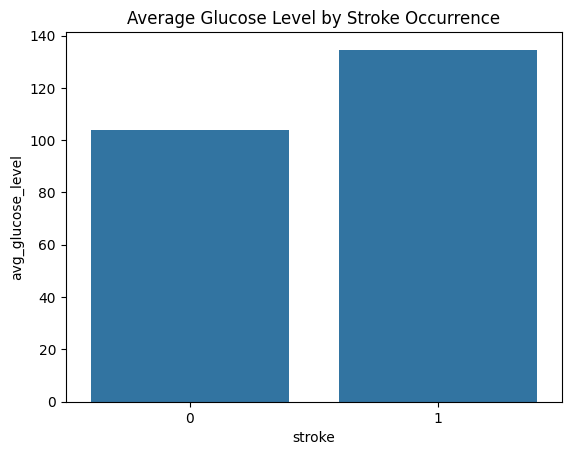

In [17]:
# Group the data by 'stroke' and calculate the mean glucose level for each group (stroke = 0 and stroke = 1)
stroke_glucose = df.groupby('stroke')['avg_glucose_level'].mean().reset_index()

# Create a bar plot to compare the average glucose levels between patients who had a stroke and those who didn't
sns.barplot(x='stroke', y='avg_glucose_level', data=stroke_glucose)

# Add a title to provide context for the plot
plt.title('Average Glucose Level by Stroke Occurrence')
plt.show()

# Key Insights:
# 1. Comparison of Glucose Levels: This chart shows whether patients who had a stroke tend to have higher average glucose levels compared to those who did not.
# 2. Correlation with Stroke Risk: If the average glucose level is significantly higher in stroke patients (stroke = 1), it suggests that elevated glucose levels may be a risk factor for stroke.
# 3. Actionable Health Insight: High glucose levels could prompt healthcare interventions, such as better glucose control for individuals at risk of stroke.

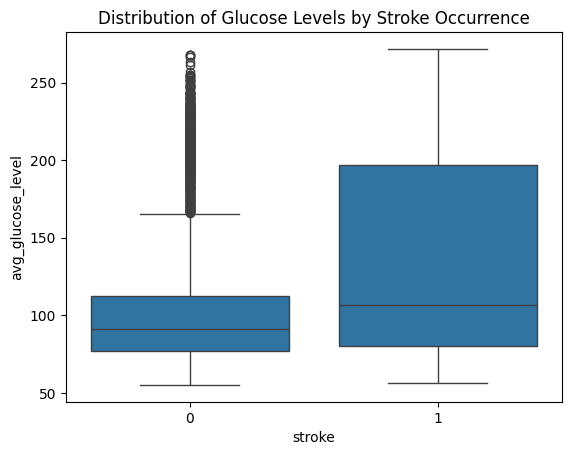

In [18]:
# Create a boxplot to compare the distribution of glucose levels between patients who had a stroke and those who did not
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)

# Add a title to provide context for the visualization
plt.title('Distribution of Glucose Levels by Stroke Occurrence')
plt.show()

# Key Insights:
# 1. Glucose Level Distribution: The boxplot shows the spread and central tendency of glucose levels for both stroke (1) and non-stroke (0) patients.
# 2. Outliers: If there are significant outliers in the stroke group, it could suggest that extremely high glucose levels are more common among stroke patients.
# 3. Median Comparison: Comparing the medians helps to assess if patients who suffered a stroke tend to have consistently higher glucose levels compared to those who didn't.
# 4. Variability: The boxplot visualizes how variable glucose levels are in both groups, helping assess the overall health variation between stroke and non-stroke patients.

#### Gender count with Matplotlip and seaborn

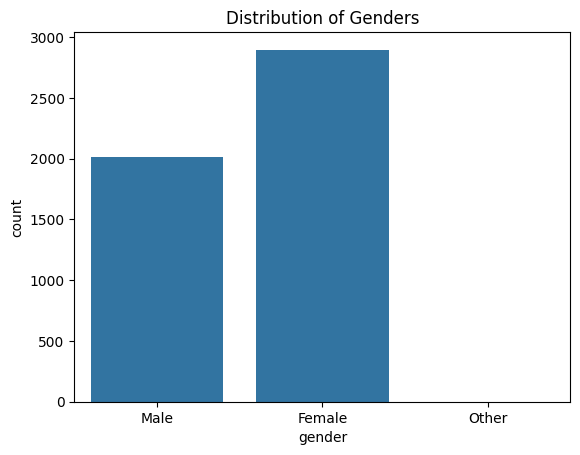

In [19]:
# Create a count plot to visualize the distribution of genders in the dataset
ax = sns.countplot(x='gender', data=df)

# Add a title to provide context for the chart
plt.title('Distribution of Genders')
plt.show()

# Key Insights:
# 1. Gender Representation: This plot helps assess whether the dataset is balanced in terms of gender representation (male, female, or other).
# 2. Potential Bias: If the dataset is heavily skewed toward one gender, it could introduce bias into any analysis related to stroke or other health conditions.
# 3. Health Insight: Gender differences in the dataset may reflect differences in the risk or prevalence of health conditions, which can help tailor healthcare strategies.

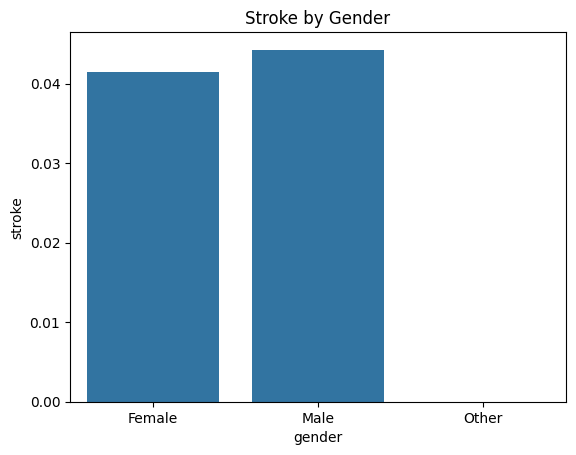

In [20]:
# Group the data by gender and calculate the mean stroke occurrence for each gender
# This shows the proportion of stroke occurrences within each gender
stroke_by_gender = df.groupby('gender')['stroke'].mean().reset_index()

# Create a bar plot to compare the average stroke occurrence between genders
sns.barplot(data=stroke_by_gender, x='gender', y='stroke')

# Add a title to provide context for the chart
plt.title('Stroke by Gender')
plt.show()

# Key Insights:
# 1. Stroke Occurrence by Gender: This plot reveals the average proportion of stroke cases for each gender, helping to identify if one gender has a higher stroke risk.
# 2. Gender-related Health Risks: If one gender has a significantly higher stroke occurrence, this insight could be crucial for gender-specific healthcare strategies.
# 3. Actionable Insight: The result can guide targeted stroke prevention programs based on gender, focusing on the group with the higher risk.

#### Distribution of people with hypertension

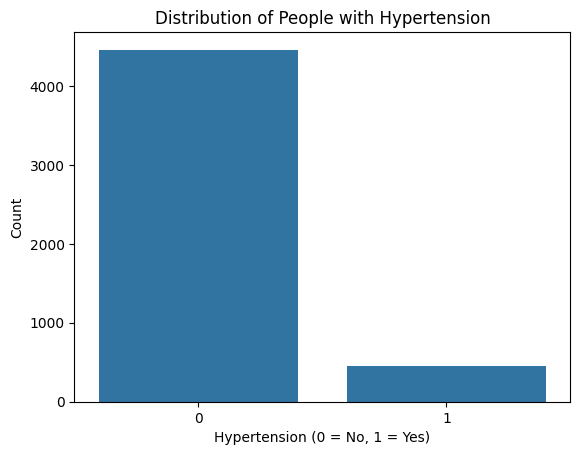

In [21]:
# Create a count plot to visualize the distribution of people with and without hypertension
sns.countplot(data=df, x='hypertension')

# Add labels and title for context
plt.xlabel('Hypertension (0 = No, 1 = Yes)')  # X-axis shows whether the patient has hypertension (0 = No, 1 = Yes)
plt.ylabel('Count')  # Y-axis shows the number of patients in each category
plt.title('Distribution of People with Hypertension')
plt.show()

# Key Insights:
# 1. Hypertension Prevalence: This plot shows the number of patients with and without hypertension, helping assess how common hypertension is within the dataset.
# 2. Health Implications: If a large proportion of the population has hypertension, this could indicate a significant risk factor for conditions like stroke, heart disease, etc.


#### Relation between hypertension and stroke

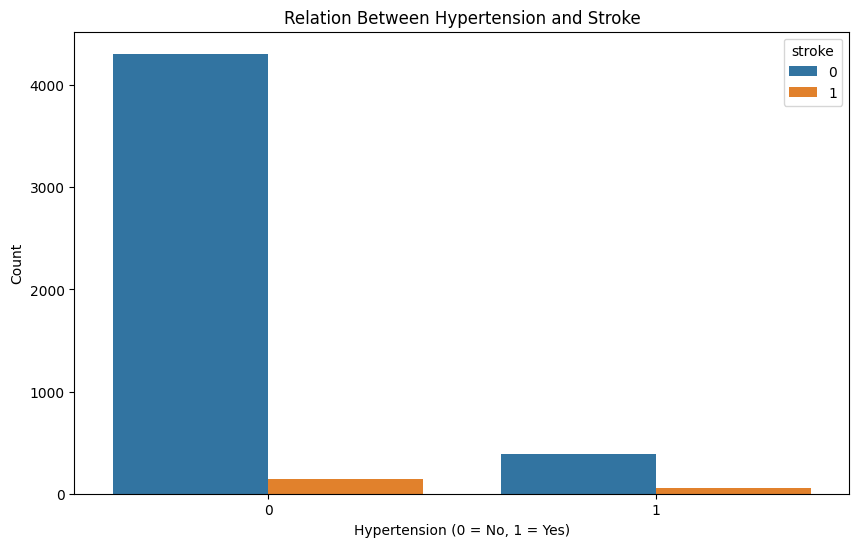

In [22]:
plt.figure(figsize=(10,6))

# Create a count plot to compare stroke occurrence among patients with and without hypertension
sns.countplot(data=df, x='hypertension', hue='stroke')

# Add labels and title for clarity
plt.title('Relation Between Hypertension and Stroke')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')  # X-axis: whether the patient has hypertension
plt.ylabel('Count')  # Y-axis: number of patients
plt.show()

# Key Insights:
# 1. Hypertension and Stroke Risk: This plot reveals the difference in stroke occurrence between patients with and without hypertension. A higher proportion of strokes in hypertensive patients suggests that hypertension may be a significant risk factor for stroke.
# 2. Comparative Analysis: The hue differentiates patients with and without stroke, allowing for easy comparison of stroke rates in each group (hypertensive vs non-hypertensive).
# 3. Targeted Interventions: If hypertensive patients show a higher stroke occurrence, healthcare interventions such as blood pressure management could be more important for this group.

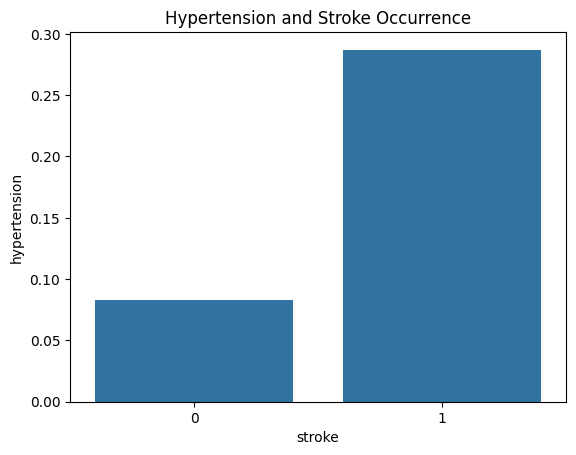

In [23]:
# Group the data by 'stroke' and calculate the mean hypertension occurrence for each group (stroke = 0 and stroke = 1)
# This shows the proportion of hypertensive patients within each stroke category (stroke = 0 means no stroke, stroke = 1 means stroke occurred)
hyper_stroke = df.groupby('stroke')['hypertension'].mean().reset_index()

# Create a bar plot to compare hypertension rates between patients who had a stroke and those who did not
sns.barplot(x='stroke', y='hypertension', data=hyper_stroke)

# Add a title for context
plt.title('Hypertension and Stroke Occurrence')
plt.show()

# Key Insights:
# 1. Hypertension and Stroke Correlation: This plot shows the proportion of patients with hypertension in both stroke and non-stroke groups, helping to reveal whether hypertensive patients have a higher likelihood of suffering a stroke.
# 2. Health Risks: If the bar for stroke patients (stroke = 1) shows a higher rate of hypertension, it suggests that hypertensive individuals are at a greater risk of having a stroke.
# 3. Healthcare Action: Insights from this chart can guide healthcare professionals to focus on managing hypertension as a way to reduce stroke risk.

#### Proportion of people with hypertension who had a stroke

<Axes: xlabel='stroke', ylabel='count'>

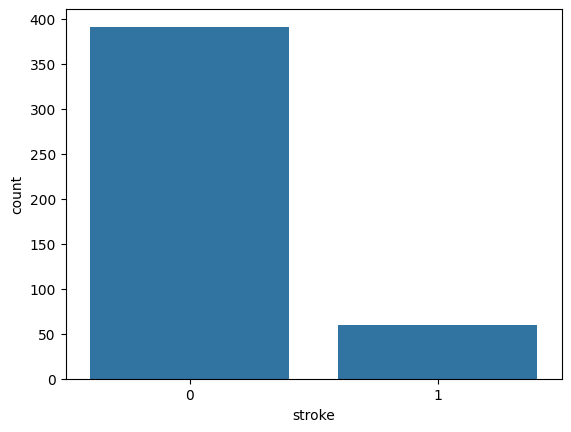

In [24]:
# Filter the dataset to include only patients with hypertension (hypertension = 1)
hyper = df[df['hypertension'] == 1]

# Create a count plot to visualize the distribution of stroke occurrence in hypertensive patients
sns.countplot(data=hyper, x='stroke')

# Key Insights:
# 1. Stroke Risk in Hypertensive Patients: This plot reveals the proportion of hypertensive patients who suffered a stroke (stroke = 1) versus those who did not (stroke = 0).
# 2. Focused Analysis: By isolating hypertensive patients, we can better understand how likely they are to suffer a stroke compared to the general population.
# 3. Preventive Healthcare: If the number of hypertensive patients with strokes is high, this reinforces the need for blood pressure management and stroke prevention in this group.

In [25]:
# Calculate the proportion of hypertensive patients who suffered a stroke
stroke_proportion = hyper['stroke'].mean()

# Display the result as a percentage
print(f"Proportion of people with hypertension who had a stroke: {stroke_proportion:.2%}")

# Key Insights:
# 1. Stroke Proportion in Hypertensive Patients: This calculation reveals the percentage of hypertensive patients who experienced a stroke.
# 2. Risk Assessment: A higher proportion indicates that hypertension is a significant risk factor for stroke, highlighting the need for targeted healthcare interventions.
# 3. Preventive Strategy: This insight can be used to emphasize the importance of controlling blood pressure in hypertensive individuals to lower their stroke risk.

Proportion of people with hypertension who had a stroke: 13.30%


#### Distribution of people with Heart disease

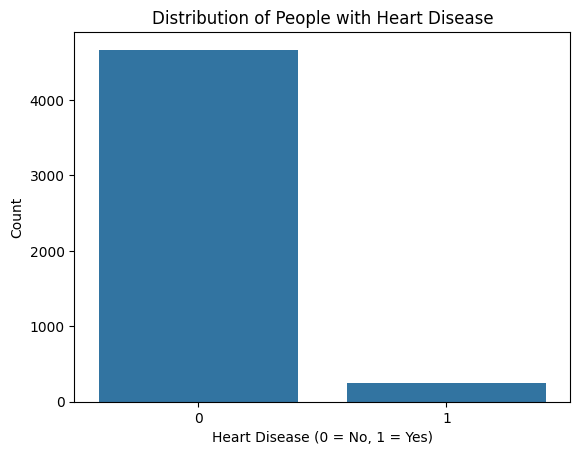

In [26]:
# Create a count plot to visualize the distribution of people with and without heart disease
sns.countplot(data=df, x='heart_disease')

# Add labels and title for context
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')  # X-axis shows whether the patient has heart disease (0 = No, 1 = Yes)
plt.ylabel('Count')  # Y-axis shows the number of patients in each category
plt.title('Distribution of People with Heart Disease')
plt.show()

# Key Insights:
# 1. Heart Disease Prevalence: This plot helps assess how common heart disease is in the dataset, providing an overview of the number of patients with heart disease.
# 2. Health Implications: A significant number of people with heart disease could indicate a higher risk for other conditions, such as stroke or hypertension.


#### Relation between Heart disease and stroke

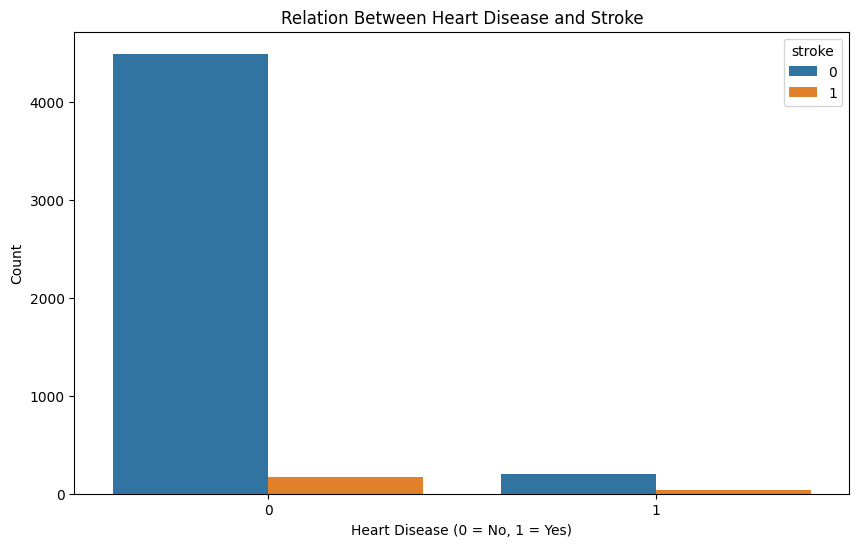

In [27]:
plt.figure(figsize=(10,6))

# Create a count plot to compare stroke occurrence among patients with and without heart disease
sns.countplot(data=df, x='heart_disease', hue='stroke')

# Add labels and title for context
plt.title('Relation Between Heart Disease and Stroke')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')  # X-axis shows whether the patient has heart disease
plt.ylabel('Count')  # Y-axis shows the number of patients
plt.show()

# Key Insights:
# 1. Heart Disease and Stroke Risk: This plot reveals how stroke occurrence differs between patients with heart disease and those without. If stroke is more common in patients with heart disease (heart_disease = 1), it suggests heart disease may be a significant risk factor for stroke.
# 2. Comparative Analysis: The hue allows for a clear comparison between the groups, showing whether heart disease significantly increases the likelihood of stroke.
# 3. Targeted Healthcare: If patients with heart disease have a higher stroke rate, it reinforces the need for cardiovascular and stroke prevention measures in this group.

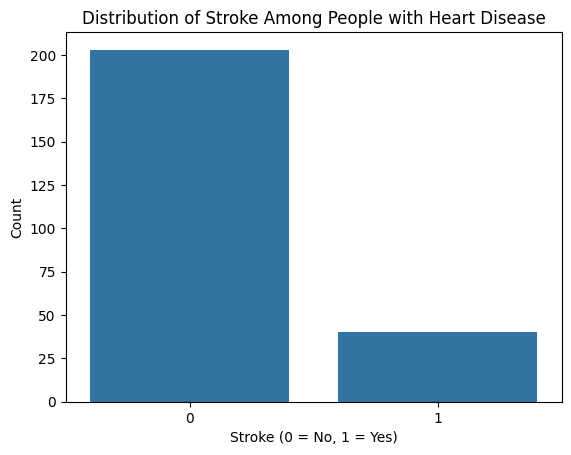

In [28]:
# Filter the dataset to include only patients with heart disease (heart_disease = 1)
heart_disease = df[df['heart_disease'] == 1]

# Create a count plot to visualize the distribution of stroke occurrence among people with heart disease
sns.countplot(data=heart_disease, x='stroke')

# Add labels and title for context
plt.title('Distribution of Stroke Among People with Heart Disease')
plt.xlabel('Stroke (0 = No, 1 = Yes)')  # X-axis shows whether the patient had a stroke
plt.ylabel('Count')  # Y-axis shows the number of patients
plt.show()

# Key Insights:
# 1. Stroke Occurrence in Heart Disease Patients: This plot reveals the proportion of people with heart disease who have suffered a stroke. A high count for stroke occurrence (stroke = 1) could suggest that heart disease is a major risk factor.
# 2. Focused Analysis: By isolating heart disease patients, this visualization helps assess the specific stroke risk within this group, providing a clearer understanding of the relationship between heart disease and stroke.
# 3. Preventive Healthcare: If a significant number of heart disease patients also suffered strokes, it reinforces the importance of cardiovascular care and stroke prevention for this high-risk group.

In [29]:
# Calculate the proportion of heart disease patients who suffered a stroke
stroke_proportion = heart_disease['stroke'].mean()

# Print the result as a percentage
print(f"Proportion of people with heart disease who had a stroke: {stroke_proportion:.2%}")

# Key Insights:
# 1. Stroke Proportion in Heart Disease Patients: This calculation reveals the percentage of heart disease patients who experienced a stroke. A higher percentage indicates that heart disease is strongly associated with stroke occurrence.
# 2. Risk Factor: A high proportion suggests that heart disease is a significant risk factor for stroke, highlighting the need for focused medical care in this group.
# 3. Preventive Measures: Understanding this proportion can help healthcare providers prioritize stroke prevention in heart disease patients.

Proportion of people with heart disease who had a stroke: 16.46%


#### Distribution of smoking status

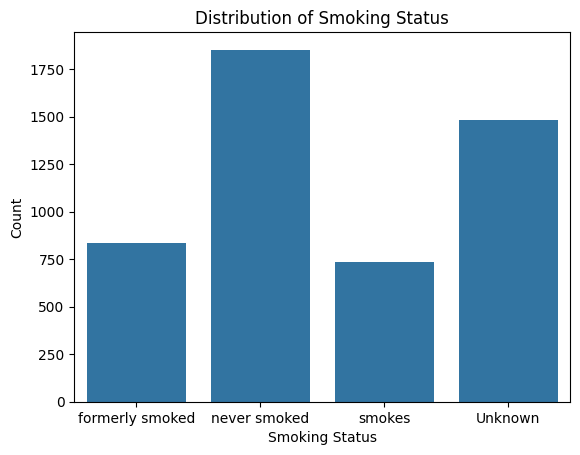

In [30]:
# Create a count plot to visualize the distribution of smoking status categories in the dataset
sns.countplot(data=df, x='smoking_status')

# Add labels and title for context
plt.xlabel('Smoking Status')  # X-axis shows different smoking status categories (e.g., never smoked, formerly smoked, etc.)
plt.ylabel('Count')  # Y-axis shows the number of patients in each category
plt.title('Distribution of Smoking Status')
plt.show()

# Key Insights:
# 1. Smoking Habits Representation: This plot shows the distribution of patients across different smoking status categories, helping to assess how common smoking is within the dataset.
# 2. Health Relevance: Smoking is a known risk factor for several health conditions, including stroke. A large proportion of smokers could indicate a higher risk for stroke and other diseases within the dataset.
# 3. Data Completeness: This visualization also helps detect if the "Unknown" smoking status is prevalent, which might affect the quality of smoking-related analysis.

#### Stroke Occurrence by Smoking Status

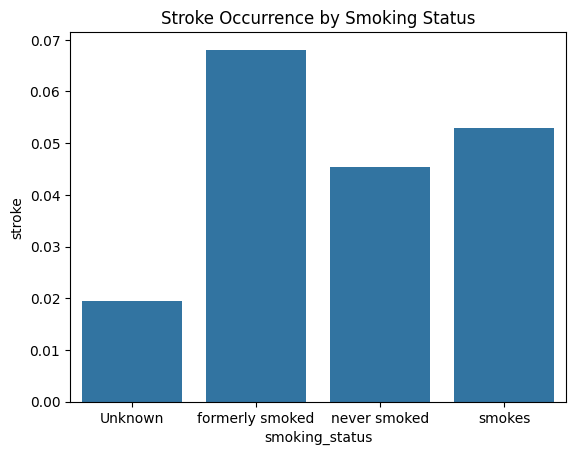

In [31]:
# Group the data by smoking status and calculate the mean stroke occurrence for each category
# This calculates the proportion of stroke cases for each smoking status category
stroke_by_smoking_status = df.groupby('smoking_status')['stroke'].mean().reset_index()

# Create a bar plot to compare stroke occurrence across different smoking status categories
sns.barplot(x='smoking_status', y='stroke', data=stroke_by_smoking_status)

# Add a title to provide context for the chart
plt.title('Stroke Occurrence by Smoking Status')
plt.show()

# Key Insights:
# 1. Smoking and Stroke Risk: This plot helps reveal whether certain smoking statuses (e.g., current smokers, former smokers) are associated with a higher stroke occurrence. A higher stroke rate for smokers would suggest that smoking is a significant risk factor.
# 2. Comparative Analysis: By comparing the stroke occurrence across different smoking statuses, this analysis helps to see whether former smokers or current smokers are more at risk.
# 3. Healthcare Action: If smokers or former smokers show a significantly higher stroke risk, this could drive healthcare campaigns focusing on smoking cessation as a preventive measure for stroke.


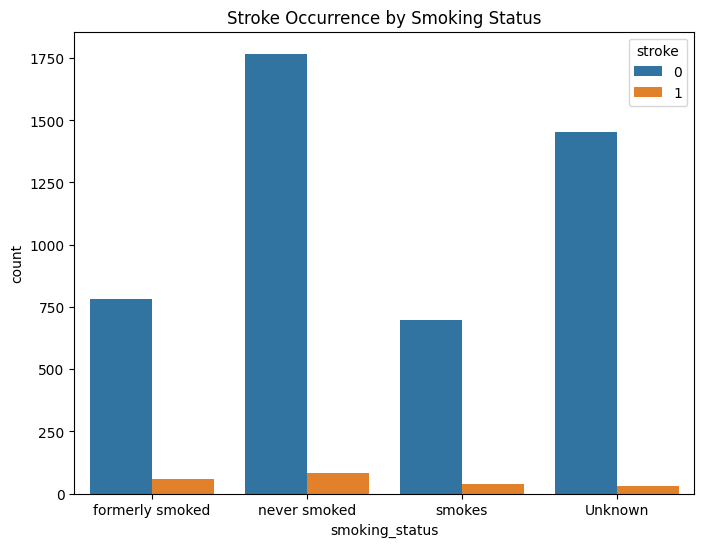

In [32]:
plt.figure(figsize=(8,6))

# Create a count plot to compare stroke occurrence among patients with different smoking statuses
sns.countplot(data=df, x='smoking_status', hue='stroke')

# Add a title for context
plt.title('Stroke Occurrence by Smoking Status')
plt.show()

# Key Insights:
# 1. Smoking Status and Stroke Risk: This plot shows how stroke occurrence differs based on smoking status (e.g., current smokers, former smokers, never smoked). If stroke occurrences are higher among smokers, this suggests that smoking is a significant risk factor.
# 2. Comparative Analysis: The hue differentiates patients with and without stroke, allowing for an easy comparison of stroke rates across smoking categories.
# 3. Health Interventions: If current or former smokers show a higher stroke occurrence, healthcare strategies could focus on smoking cessation as a way to reduce stroke risk.

#### Stroke Occurrence Distribution

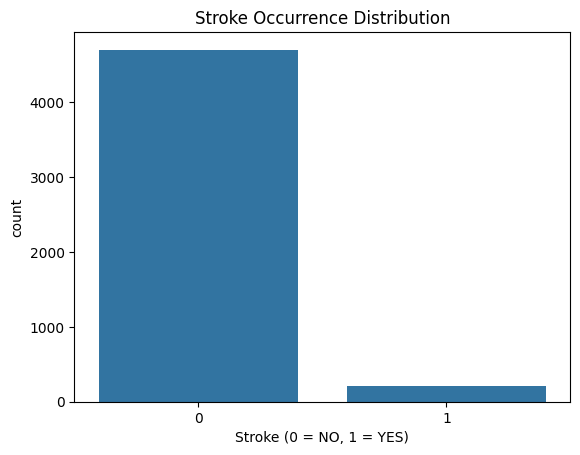

In [33]:
# Create a count plot to visualize the distribution of stroke occurrence (0 = No stroke, 1 = Stroke)
sns.countplot(data=df, x='stroke')

# Add labels and title for context
plt.title('Stroke Occurrence Distribution')  # Title to explain the plot
plt.xlabel('Stroke (0 = NO, 1 = YES)')  # X-axis shows if the patient had a stroke or not
plt.show()

# Key Insights:
# 1. Stroke Prevalence: This plot shows the overall distribution of patients who suffered a stroke versus those who did not. It helps understand how common strokes are within the dataset.


#### Correlation Matrix

In [34]:
# Calculate the Pearson correlation matrix for selected variables
# Pearson correlation measures the linear relationship between variables
df_corr = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']].corr(method='pearson')

# Display the correlation matrix
df_corr

# Key Insights:
# 1. Variable Relationships: This correlation matrix helps identify how strongly variables like age, hypertension, heart disease, glucose levels, and BMI are related to each other and to stroke.


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274329,0.256999,0.235725,0.333738,0.232221
hypertension,0.274329,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.256999,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.235725,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.333738,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.232221,0.142515,0.137938,0.138936,0.042374,1.000000


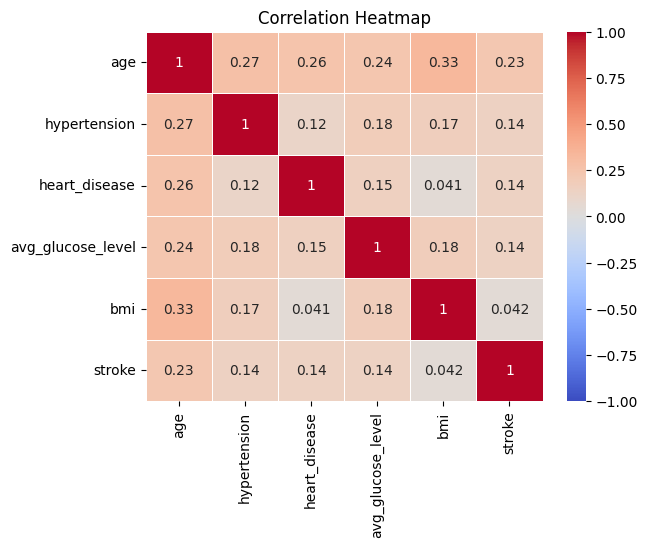

In [35]:
# Create a heatmap to visualize the Pearson correlation matrix between key variables
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Add a title for context
plt.title('Correlation Heatmap')
plt.show()

# Key Insights:
# 1. **Age and Stroke (Correlation: 0.23)**: 
   #- There is a moderate positive correlation between age and stroke occurrence (0.23), indicating that older individuals are more likely to suffer from a stroke. While the correlation is not very strong, it still suggests that age plays a significant role in stroke risk.
   
# 2. **Hypertension and Stroke (Correlation: 0.14)**: 
   #- The correlation between hypertension and stroke is positive but relatively weak (0.14). This indicates that people with hypertension are slightly more likely to experience a stroke, but other factors might play a larger role.
   
# 3. **Heart Disease and Stroke (Correlation: 0.14)**: 
   #- Similar to hypertension, the correlation between heart disease and stroke is weak (0.14). This suggests that while heart disease is a risk factor for stroke, it may not be as strong a predictor on its own in this dataset.

# 4. **Glucose Levels and Stroke (Correlation: 0.14)**: 
   #- The correlation between average glucose levels and stroke is also weak (0.14), suggesting that higher glucose levels might contribute to stroke risk, but other factors likely have a larger influence in the dataset.

# 5. **BMI and Stroke (Correlation: 0.04)**: 
   #- The correlation between BMI and stroke is very weak (0.04), indicating that BMI does not appear to be a strong predictor of stroke risk in this dataset. This suggests that, at least in this case, BMI might not be as significant a factor in stroke risk compared to age or hypertension.

# Additional Insights:
# - **Age and Hypertension (Correlation: 0.27)**: The positive correlation indicates that older individuals are more likely to have hypertension, which indirectly increases stroke risk.
# - **Age and BMI (Correlation: 0.33)**: There is a moderate positive correlation between age and BMI, meaning that older individuals tend to have higher BMI, which may affect their overall health but does not strongly influence stroke occurrence based on this dataset.

In [36]:
# Select the independent variables (hypertension, heart_disease, avg_glucose_level, bmi) and the dependent variable (stroke)
X = df[['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
y = df['stroke']

# Add a constant to the logistic regression model
# This is necessary to include the intercept in the regression model
X = sm.add_constant(X)

# Fit the logistic regression model to assess the impact of each variable on stroke risk
logit_model = sm.Logit(y, X).fit()

# Display the model summary, which includes coefficients, standard errors, and p-values
print(logit_model.summary())

# Key Insights from the Model:
# 1. Hypertension (Coefficient: 1.1009, p-value: 0.000):
#    Hypertension is a significant predictor of stroke. The positive coefficient indicates that patients with hypertension
#    are more likely to suffer a stroke, making hypertension an important factor for stroke risk management.
#
# 2. Heart Disease (Coefficient: 1.2074, p-value: 0.000):
#    Heart disease is also a strong and significant predictor of stroke. The positive coefficient implies that patients
#    with heart disease have an increased likelihood of stroke, suggesting cardiovascular health is crucial in stroke prevention.
#
# 3. Average Glucose Level (Coefficient: 0.0080, p-value: 0.000):
#    Higher average glucose levels are associated with a higher likelihood of stroke, though the effect size is small.
#    This underscores the importance of managing blood glucose to lower stroke risk, especially for patients with elevated levels.
#
# 4. BMI (Coefficient: 0.0036, p-value: 0.700):
#    BMI is not a statistically significant predictor of stroke in this dataset. The p-value (0.700) suggests no meaningful
#    relationship between BMI and stroke risk. Thus, BMI may not be a crucial factor for stroke in this population.
#
# 5. Model Fit (Pseudo R-squared: 0.08558):
#    The model explains about 8.56% of the variance in stroke occurrence. This suggests that other factors beyond the ones 
#    considered here may be contributing to stroke risk, highlighting the need to explore additional variables or factors.

Optimization terminated successfully.
         Current function value: 0.160976
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 4909
Model:                          Logit   Df Residuals:                     4904
Method:                           MLE   Df Model:                            4
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                 0.08558
Time:                        21:45:30   Log-Likelihood:                -790.23
converged:                       True   LL-Null:                       -864.19
Covariance Type:            nonrobust   LLR p-value:                 5.673e-31
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.4658      0.303    -14.716      0.000      -5.061      -3.871
hyperten